<a href="https://colab.research.google.com/github/sv-data-science/masterplan/blob/master/L17_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance comparision on SOTAs

In [1]:
# Get the imagenet data & helper files 
!wget https://cs109b-course-data.s3.amazonaws.com/CS109B.zip

!if [ -d GEC ]; then rm -rf GEC; fi
# Unzip all the files 
!unzip -qq CS109B.zip
!cp GEC/helper.py helper.py

--2021-03-15 01:54:14--  https://cs109b-course-data.s3.amazonaws.com/CS109B.zip
Resolving cs109b-course-data.s3.amazonaws.com (cs109b-course-data.s3.amazonaws.com)... 52.216.242.236
Connecting to cs109b-course-data.s3.amazonaws.com (cs109b-course-data.s3.amazonaws.com)|52.216.242.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207677638 (198M) [application/zip]
Saving to: ‘CS109B.zip’

CS109B.zip          100%[===================>] 198.06M  57.4MB/s    in 3.5s    

2021-03-15 01:54:17 (57.4 MB/s) - ‘CS109B.zip’ saved [207677638/207677638]



In [2]:
# Import required libraries
import sys, os, time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
colors = ['k', 'g', 'r','b','c']
plt.style.use('seaborn-whitegrid')
import pickle
import helper
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
import timeit

## Loading the data

In [3]:
# Useful dictionary to go from label index to actual label
with open('GEC/idx2name.pkl', 'rb') as handle:
    keras_idx_to_name = pickle.load(handle)

In [4]:
# Loading input image and labels
images = np.load("GEC/x_val.npy") # loaded as RGB
labels = np.load("GEC/y_val.npy")

# Taking only 100 samples for quicker computation
x_val = images[:100]
y_val = labels[:100]
# One hot encoding the labels
y_val_one_hot = to_categorical(y_val, 1000)

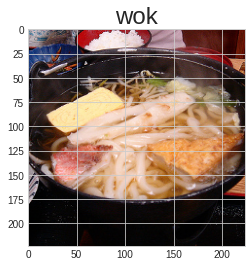

In [5]:
# Print a sample image and label
plt.title(keras_idx_to_name[y_val[0]],fontsize=24,y=0.88)
plt.imshow(x_val[0].astype('int64'))
plt.show()

## Benchmark models

In [6]:
# Helper function to get key stats
# (evaluation speed, top-1 % accuracy, total model parameters)
def model_stats(model,x_val,name):
  print("Input shape:",x_val.shape)
  #Time for evaluation
  time = timeit.timeit(lambda: model.predict(x_val, verbose=1), number=1)
  # Accuracy
  y_pred = model.predict(x_val)
  top_1 = np.any(np.argsort(y_pred)[:,-1:].T == y_val_one_hot.argmax(axis=1),axis=0).mean()
  # Model size 
  params = model.count_params()
  print("Execution time:", time, "Params:", params)
  return (time,top_1,params,name)

## SOTA architectures

For this exercise, we will consider the following SOTAs:
- VGG16
- VGG19
- InceptionV3
- ResNet50
- MobileNet

In [7]:
# VGG16 stats
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Preprocess step
# We need to call the data because some preprocess steps
# change the value inplace
x_val = np.load("GEC/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the VGG16 model
model = VGG16()

# Collect stats 
vgg16stats = model_stats(model,x_val,'VGG16')

553467904/553467096 [==============================] - 4s 0us/step
Input shape: (100, 224, 224, 3)
4/4 [==============================] - 50s 11s/step
Execution time: 50.130090769999995 Params: 138357544


In [9]:
# VGG19 stats
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

x_val = np.load("GEC/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the VGG19 model
model = VGG19()

# Collect stats 
vgg19stats = model_stats(model,x_val,'VGG19')

574717952/574710816 [==============================] - 3s 0us/step
Input shape: (100, 224, 224, 3)
4/4 [==============================] - 62s 14s/step
Execution time: 62.53446802600001 Params: 143667240


In [12]:
# Inception Stats
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input

x_val = np.load("GEC/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the InceptionV3 model. Set the input shape using the parameter input_tensor=Input(shape=(224, 224, 3))
# InceptionV3's default input shape is (299, 299, 3). So we set the input shape to (224, 224, 3)
model = InceptionV3(input_tensor=Input(shape=(224, 224, 3)))

# Collect stats 
inceptionstats = model_stats(model,x_val,'Inception')

Input shape: (100, 224, 224, 3)
4/4 [==============================] - 11s 2s/step
Execution time: 11.123459728000057 Params: 23851784


In [16]:
# Resnet50 stats
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

x_val = np.load("GEC/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the ResNet50 model
model = ResNet50()

# Collect stats 
resnetstats = model_stats(model,x_val,'Resnet50')

102973440/102967424 [==============================] - 1s 0us/step
Input shape: (100, 224, 224, 3)
4/4 [==============================] - 16s 3s/step
Execution time: 16.29198064100001 Params: 25636712


In [15]:
# MobileNet stats
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
x_val = np.load("GEC/x_val.npy") # loaded as RGB
x_val = x_val[:100]
x_val = preprocess_input(x_val)

# Call the MobielNetV2 model
model = MobileNetV2()

# Collect stats 
mobilestats = model_stats(model,x_val,'MobileNet')

14540800/14536120 [==============================] - 0s 0us/step
Input shape: (100, 224, 224, 3)
4/4 [==============================] - 4s 791ms/step
Execution time: 4.279690334999941 Params: 3538984


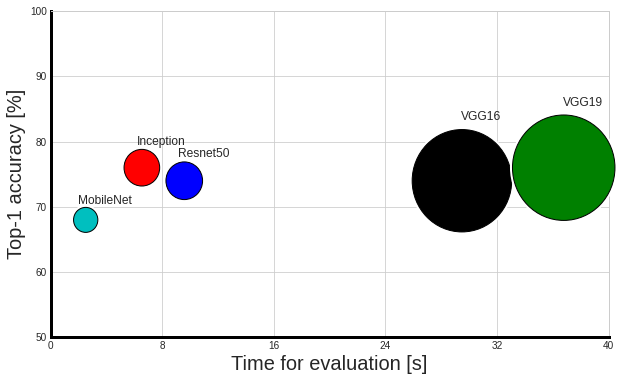

In [17]:
# Use the helper code below 
# to plot the model stats for each SOTA
#max_ylim = int(vgg19stats[0])+10
stats_list = [vgg16stats, vgg19stats, inceptionstats,resnetstats, mobilestats]
max_ylim = int(max([stat[0] for stat in stats_list])*1.1)
fig, ax  = plt.subplots(figsize=(10,6))
for i,val in enumerate(stats_list):
    r = val[2]/10**9 + 0.04
    helper.ellipse(val[0]/max_ylim,val[1],width=r,height=0.44*r,color = colors[i],ax=ax)
    ax.text(val[0]/max_ylim + 0.035, val[1]+r/4+ 0.004, val[3], va='center', ha='center',fontsize=12)
    
ax.set_ylim([0.6,0.85])
ax.set_ylabel('Top-1 accuracy [%]',fontsize=20)
ax.set_xlabel('Time for evaluation [s]',fontsize=20)
ax.set_xticklabels(range(0,60,8));
ax.set_yticklabels(range(50,110,10));
for axis in ['bottom','left']:
  ax.spines[axis].set_linewidth(3)
  ax.spines[axis].set_color('k')

### 🍲 Larger dataset

Go back and take a larger sample of images, do your results remain consistent?